# Features_net.py

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("Data/labeled_db.csv", parse_dates=["Timestamp"])

# Define the desired order of features within each bar group
desired_feature_order = ['Unique_IPs',
                         'Num_Sockets', 'Upload_speed', 'Download_speed']

# Ensure the selected features are present in the dataset
features = [feature for feature in desired_feature_order if feature in df.columns]

# Apply a logarithmic scale to the features (adding a small constant to avoid log(0))
df[features] = np.log1p(df[features])

KeyError: "None of [Index(['Unique_IPs', 'Num_Sockets', 'Upload_speed', 'Download_speed'], dtype='object')] are in the [columns]"

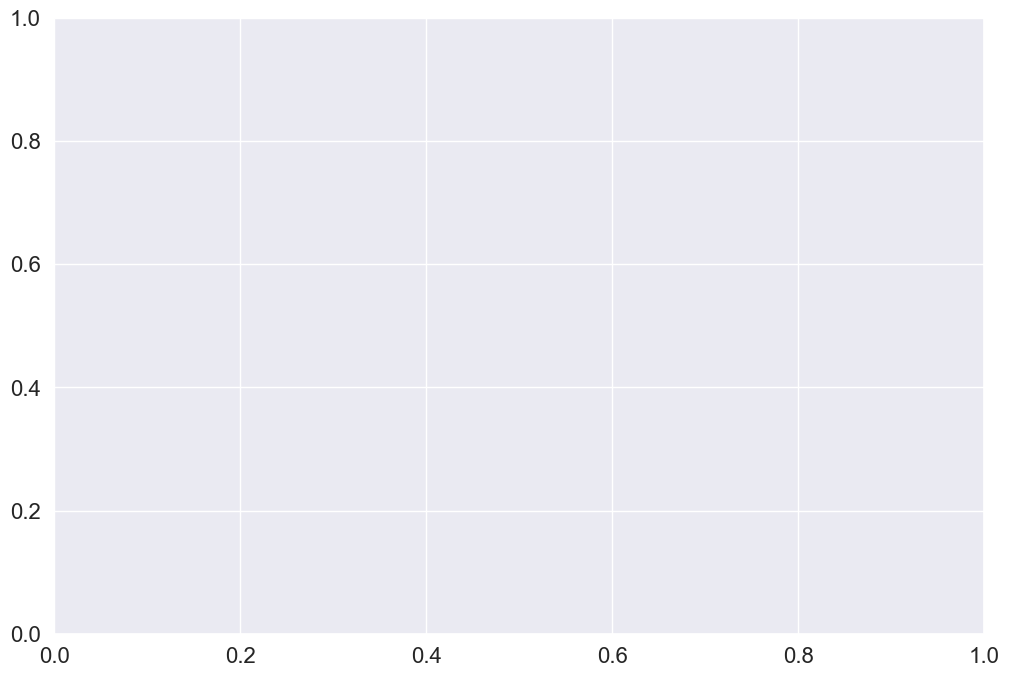

In [140]:


# Define consistent colors for each feature
feature_colors = plt.cm.tab10.colors[:len(features)]

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels


# Create a grouped bar chart for each feature
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
positions = np.arange(len(df['Attack-type'].unique()))


# # Iterate over attack types and plot each one side by side for each feature
# for i, attack_type in enumerate(df['Attack-type'].unique()):
#     attack_data = df[df['Attack-type'] == attack_type][features]

#     # Plot bars for each feature with consistent colors and desired order
#     bars = ax.bar(i + np.arange(len(features)) * bar_width,
#                   attack_data[desired_feature_order].mean(), width=bar_width, color=feature_colors, alpha=0.7)

#     # Add markers for the 25th and 75th percentiles
#     ax.errorbar(i + np.arange(len(features)) * bar_width + bar_width / 2,
#                 attack_data[desired_feature_order].median(),
#                 yerr=[attack_data[feature].median() - attack_data[feature].quantile(0.25)
#                       for feature in desired_feature_order],
#                 fmt='o', color='black', markersize=8, capsize=5, label='_nolegend_')

# # Create a legend with consistent colors and feature labels
# ax.legend(bars, desired_feature_order, title='Features',
#           loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
# # ax.legend(bars, desired_feature_order, title='Features',
# #           loc='upper right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
# # ax.legend(loc='lower right')
# ax.set_ylabel('Logarithmic Scale of Feature Values')
# # ax.legend(loc=1)
# plt.yscale('log')  # Use logarithmic scale for the Y-axis
# plt.xlabel('Traffic Type')
# plt.xticks(np.arange(len(df['Attack-type'].unique())) + (bar_width * (len(features) - 1) / 2), [
#            attack_type_mapping.get(att_type.lower(), att_type.title()) for att_type in df['Attack-type'].unique()])
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the subplot layout

# fig.savefig('figure/ddos-net.png')
# plt.show()


# Features_sys.py file

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {'Attack-type': list(df['Attack-type']),
        'CPU-usage': list(df['CPU-usage']),
        'Interrupts-per-sec': list(df['Interrupts-per-sec']),
        'Num-processes': list(df['Num-processes']),
        'RAM-percentage': list(df['RAM-percentage']),
        'DSK-write': list(df['DSK-write']),
        'DSK-read': list(df['DSK-read'])}

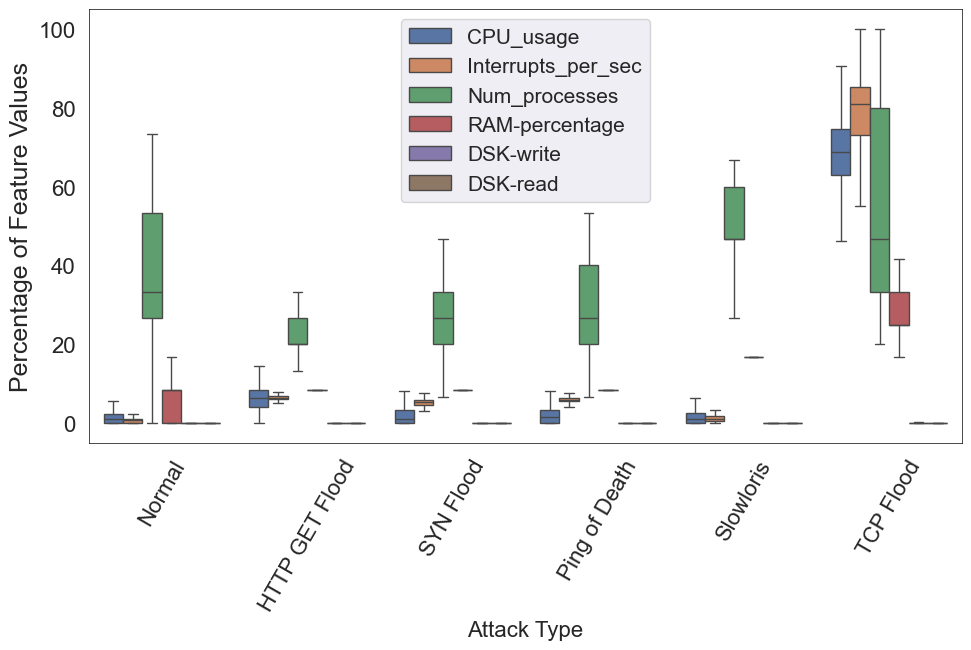

In [ ]:
dfn = pd.DataFrame(data)
# Set a larger font size for the plot
sns.set(rc={'font.size': 16})

# Reshape the DataFrame using melt
df_melted = pd.melt(dfn, id_vars='Attack_Type', var_name='Feature', value_name='Value')

fig, ax = plt.subplots(figsize=(10, 7))
# Box plot based on the 'Labels' column for both variables
sns.boxplot(x='Attack_Type', y='Value', hue='Feature', data=df_melted, showfliers=False, ax=ax)
ax.set_facecolor('white')
# Rotate x-axis labels vertically
plt.xticks(rotation=60, fontsize=16)
plt.yticks(fontsize=16)
# Set y-axis label
plt.xlabel('Attack Type', fontsize=16)
plt.ylabel('Percentage of Feature Values', fontsize=18)
# plt.title('Percentage of Feature Values')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the subplot layout
# Add border to the plot
# Increase the size of the legend
ax.legend(fontsize=15)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(.5)

fig.savefig('figure/ddos-sys.png')
plt.show()

In [153]:
desired_feature_order = ['Unique_IPs',
                         'Num_Sockets', 'Upload_speed', 'Download_speed']

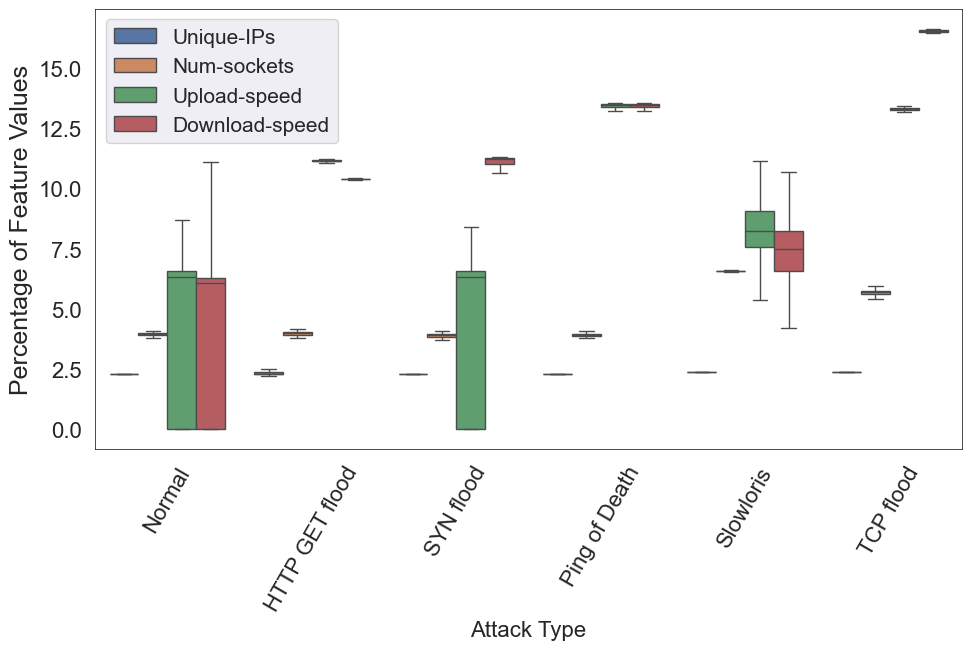

In [155]:

data = {'Attack-type': list(df['Attack-type']),
        'Unique-IPs': list(df['Unique-IPs']),
        'Num-sockets': list(df['Num-sockets']),
        'Upload-speed': list(df['Upload-speed']),
        'Download-speed': list(df['Download-speed']),
}

dfn = pd.DataFrame(data)
# Set a larger font size for the plot
sns.set(rc={'font.size': 16})

# Reshape the DataFrame using melt
df_melted = pd.melt(dfn, id_vars='Attack-type', var_name='Feature', value_name='Value')

fig, ax = plt.subplots(figsize=(10, 7))
# Box plot based on the 'Labels' column for both variables
sns.boxplot(x='Attack-type', y='Value', hue='Feature', data=df_melted, showfliers=False, ax=ax)
ax.set_facecolor('white')
# Rotate x-axis labels vertically
plt.xticks(rotation=60, fontsize=16)
plt.yticks(fontsize=16)
# Set y-axis label
plt.xlabel('Attack Type', fontsize=16)
plt.ylabel('Percentage of Feature Values', fontsize=18)
# plt.title('Percentage of Feature Values')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the subplot layout
# Add border to the plot
# Increase the size of the legend
ax.legend(fontsize=15)

# plt.yscale('log')  # Use logarithmic scale for the Y-axis
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(.5)

fig.savefig('figure/ddos-net.png')
plt.show()